In [1]:
import scanpy as sc
import math
import os


# todo: work on imports
import sys
sys.path.append("../")
#from mir.common import parser, Repertoire, SegmentLibrary
#from mir.distances import ClonotypeAligner, AlignGermline
#from mir.comparative import DenseMatch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import time
import umap as um
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans,DBSCAN
from sklearn.feature_selection import f_classif
from scipy import stats

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


import scipy.sparse as sp_sparse
#import tables


/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import muon as mu

from muon import atac as ac
from muon import prot as pt

In [45]:
#data_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/healthy/donor1/filtered_feature_bc_matrix'
data_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/healthy/donor1/vdj_v1_hs_aggregated_donor1_filtered_feature_bc_matrix.h5'

In [46]:
mdata = mu.read_10x_h5(data_path)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


In [47]:
mdata.shape

(55206, 33602)

In [48]:
mu.pp.intersect_obs(mdata)
mdata.shape

(55206, 33602)

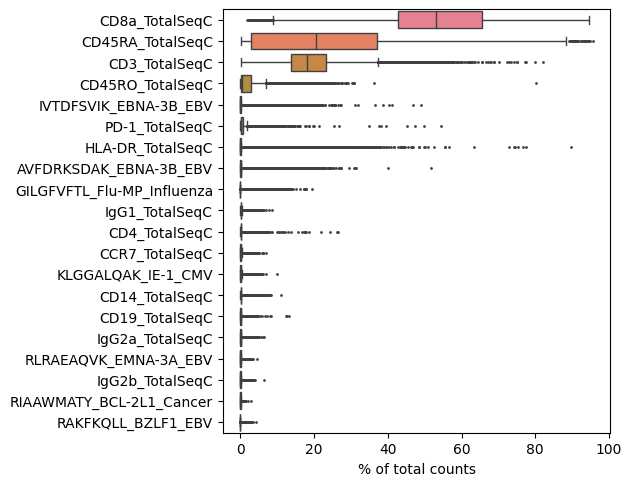

In [49]:
sc.pl.highest_expr_genes(mdata['prot'], n_top=20)

In [50]:
sc.pp.calculate_qc_metrics(mdata["prot"], inplace=True, percent_top=None)
sc.pp.calculate_qc_metrics(mdata["rna"], inplace=True, percent_top=None)

In [51]:
mdata["prot"].var

gene_ids     feature_types genome  \
CD3_TotalSeqC                        CD3  Antibody Capture          
CD19_TotalSeqC                      CD19  Antibody Capture          
CD45RA_TotalSeqC                  CD45RA  Antibody Capture          
CD4_TotalSeqC                        CD4  Antibody Capture          
CD8a_TotalSeqC                      CD8a  Antibody Capture          
...                                  ...               ...    ...   
STEGGGLAY_NC          A0101_STEGGGLAY_NC  Antibody Capture          
ALIAPVHAV_NC          A0201_ALIAPVHAV_NC  Antibody Capture          
AYSSAGASI_NC          A2402_AYSSAGASI_NC  Antibody Capture          
GPAESAAGL_NC          B0702_GPAESAAGL_NC  Antibody Capture          
AAKGRGAAL_NC      NR(B0801)_AAKGRGAAL_NC  Antibody Capture          

                  n_cells_by_counts  mean_counts  log1p_mean_counts  \
CD3_TotalSeqC                 55206  1009.645264           6.918344   
CD19_TotalSeqC                37694     3.656849           1.538339   
CD45RA_TotalSeqC              55206  1276.951660           7.153014   
CD4_TotalSeqC                 42929     5.717567           1.904726   
CD8a_TotalSeqC                55206  2783.293701           7.931749   
...                             ...          ...                ...   
STEGGGLAY_NC                   6370     0.205757           0.187107   
ALIAPVHAV_NC                   4190     0.125783           0.118479   
AYSSAGASI_NC                   4736     0.260950           0.231865   
GPAESAAGL_NC                   3516     0.123918           0.116821   
AAKGRGAAL_NC                   3818     0.128863           0.121211   

                  pct_dropout_by_counts  total_counts  log1p_total_counts  
CD3_TotalSeqC                  0.000000    55738088.0           17.836174  
CD19_TotalSeqC                31.721190      201880.0           12.215434  
CD45RA_TotalSeqC               0.000000    70495408.0           18.071058  
CD4_TotalSeqC                 22.238525      315644.0           12.662374  
CD8a_TotalSeqC                 0.000000   153653664.0           18.850212  
...                                 ...           ...                 ...  
STEGGGLAY_NC                  88.461399       11359.0            9.337853  
ALIAPVHAV_NC                  92.410245        6944.0            8.845778  
AYSSAGASI_NC                  91.421222       14406.0            9.575470  
GPAESAAGL_NC                  93.631127        6841.0            8.830835  
AAKGRGAAL_NC                  93.084085        7114.0            8.869961  

[64 rows x 9 columns]

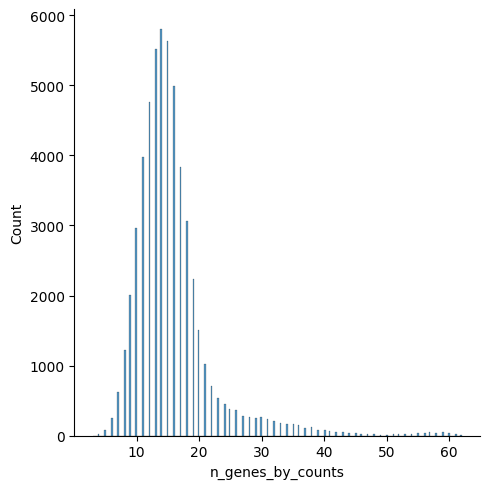

In [52]:
sns.displot(mdata["prot"].obs.n_genes_by_counts)

In [53]:
klg = mdata['prot'].var_names.str.startswith('KLG')
prot = mdata['prot'][:,np.invert(klg)]

In [54]:
mu.prot.pp.clr(prot)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/muon/_prot/preproc.py:219: UserWarning: adata.X is sparse but not in CSC format. Converting to CSC.
  warn("adata.X is sparse but not in CSC format. Converting to CSC.")


In [55]:
sc.tl.pca(prot)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


In [56]:
sc.pp.neighbors(prot)
sc.tl.umap(prot, random_state=1)

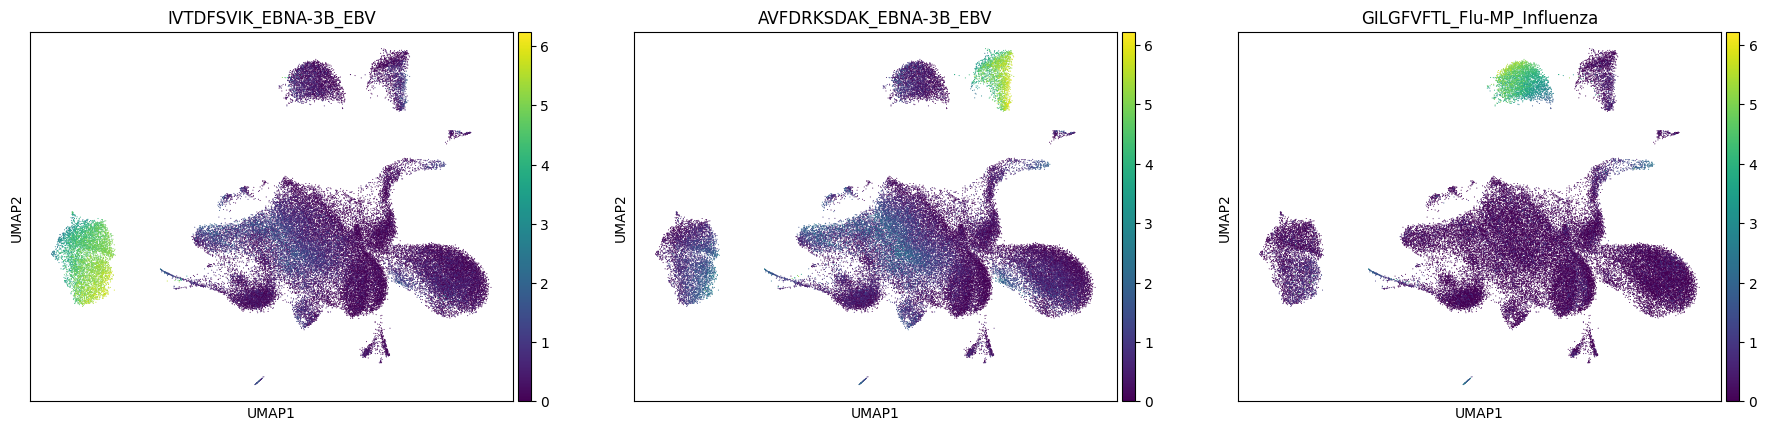

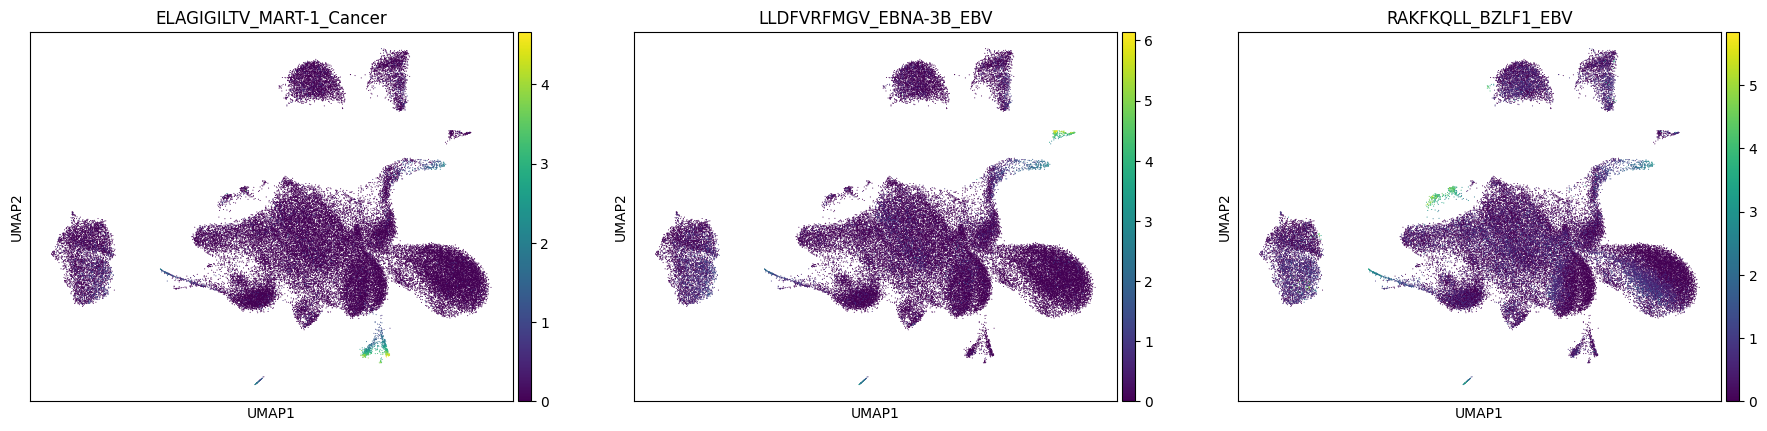

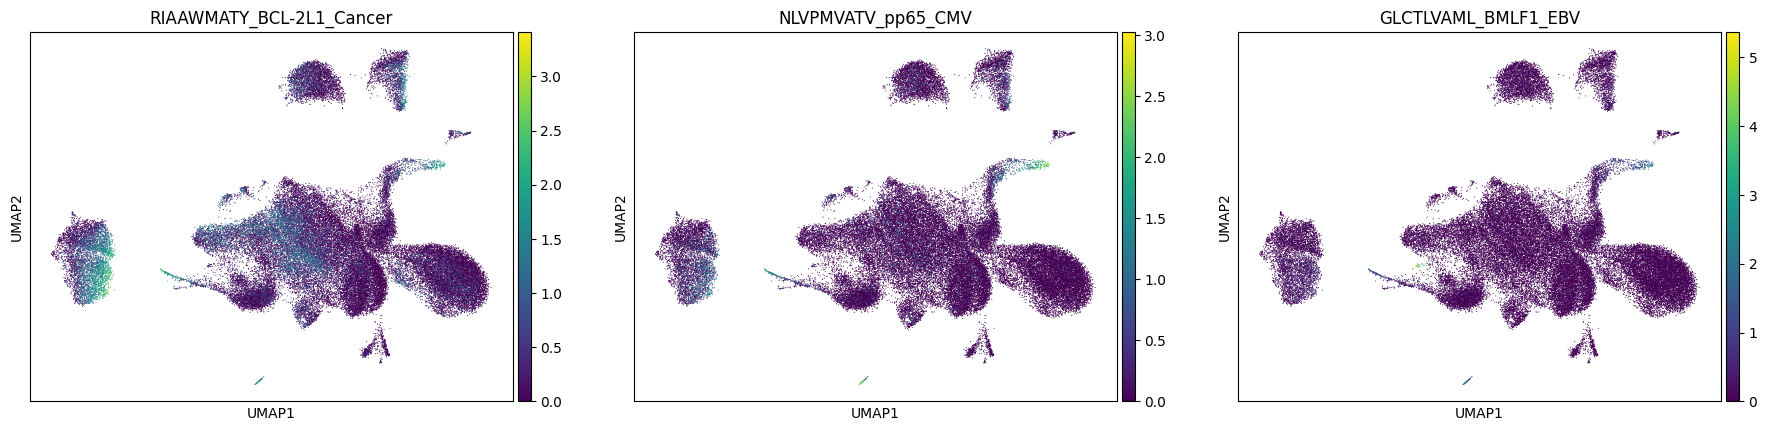

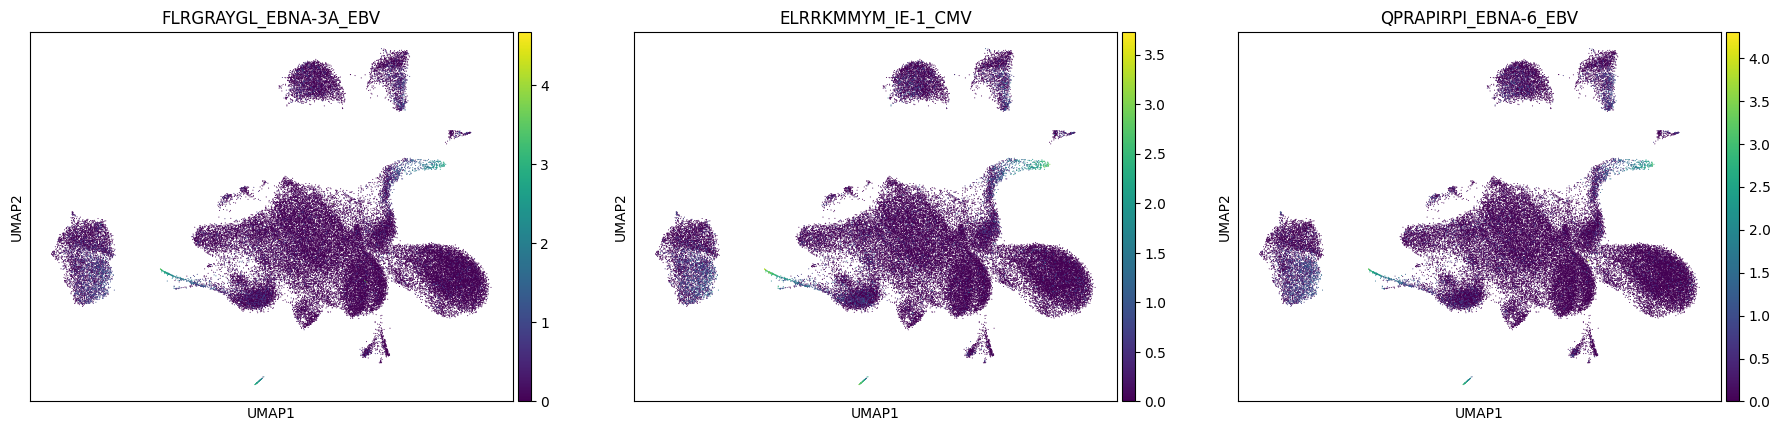

In [57]:
sc.pl.umap(prot, color=['IVTDFSVIK_EBNA-3B_EBV', 'AVFDRKSDAK_EBNA-3B_EBV','GILGFVFTL_Flu-MP_Influenza'])
sc.pl.umap(prot, color=['ELAGIGILTV_MART-1_Cancer', 'LLDFVRFMGV_EBNA-3B_EBV','RAKFKQLL_BZLF1_EBV'])
sc.pl.umap(prot, color=['RIAAWMATY_BCL-2L1_Cancer', 'NLVPMVATV_pp65_CMV','GLCTLVAML_BMLF1_EBV'])
sc.pl.umap(prot, color=['FLRGRAYGL_EBNA-3A_EBV', 'ELRRKMMYM_IE-1_CMV','QPRAPIRPI_EBNA-6_EBV'])

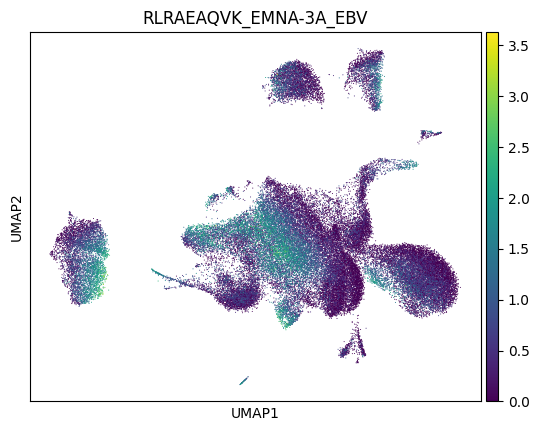

In [59]:
sc.pl.umap(prot, color=['RLRAEAQVK_EMNA-3A_EBV'])

In [60]:
prot.var.sort_values('n_cells_by_counts').tail(60)

gene_ids  \
SLYNTVATLY_Gag-protein_HIV                  A0201_SLYNTVATLY_Gag-protein_HIV   
CLLWSFQTSA_Tyrosinase_Cancer              A0201_CLLWSFQTSA_Tyrosinase_Cancer   
CLLGTYTQDV_Kanamycin-B-dioxygenase  A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase   
SLFNTVATLY_Gag-protein_HIV                  A0201_SLFNTVATLY_Gag-protein_HIV   
SLEGGGLGY_NC                                              A0101_SLEGGGLGY_NC   
RPHERNGFTVL_pp65_CMV                              B0702_RPHERNGFTVL_pp65_CMV   
ELAGIGILTV_MART-1_Cancer                      A0201_ELAGIGILTV_MART-1_Cancer   
KVAELVHFL_MAGE-A3_Cancer                      A0201_KVAELVHFL_MAGE-A3_Cancer   
SLLMWITQV_NY-ESO-1_Cancer                    A0201_SLLMWITQV_NY-ESO-1_Cancer   
SLFNTVATL_Gag-protein_HIV                    A0201_SLFNTVATL_Gag-protein_HIV   
GLCTLVAML_BMLF1_EBV                                A0201_GLCTLVAML_BMLF1_EBV   
FLASKIGRLV_Ca2-indepen-Plip-A2          A0201_FLASKIGRLV_Ca2-indepen-Plip-A2   
RMFPNAPYL_WT-1                                          A0201_RMFPNAPYL_WT-1   
ILKEPVHGV_RT_HIV                                      A0201_ILKEPVHGV_RT_HIV   
FLYALALLL_LMP2A_EBV                                A0201_FLYALALLL_LMP2A_EBV   
YLLEMLWRL_LMP1_EBV                                  A0201_YLLEMLWRL_LMP1_EBV   
KTWGQYWQV_gp100_Cancer                          A0201_KTWGQYWQV_gp100_Cancer   
RTLNAWVKV_Gag-protein_HIV                    A0201_RTLNAWVKV_Gag-protein_HIV   
TPRVTGGGAM_pp65_CMV                                B0702_TPRVTGGGAM_pp65_CMV   
MLDLQPETT_16E7_HPV                                  A0201_MLDLQPETT_16E7_HPV   
AYAQKIFKI_IE-1_CMV                                  A2402_AYAQKIFKI_IE-1_CMV   
YLNDHLEPWI_BCL-X_Cancer                        A0201_YLNDHLEPWI_BCL-X_Cancer   
IMDQVPFSV_gp100_Cancer                          A0201_IMDQVPFSV_gp100_Cancer   
GPAESAAGL_NC                                              B0702_GPAESAAGL_NC   
LLFGYPVYV_HTLV-1                                      A0201_LLFGYPVYV_HTLV-1   
IPSINVHHY_pp65_CMV                                  B3501_IPSINVHHY_pp65_CMV   
AAKGRGAAL_NC                                          NR(B0801)_AAKGRGAAL_NC   
RPPIFIRRL_EBNA-3A_EBV                            B0702_RPPIFIRRL_EBNA-3A_EBV   
ALIAPVHAV_NC                                              A0201_ALIAPVHAV_NC   
CYTWNQMNL_WT1-(235-243)236M_Y            A2402_CYTWNQMNL_WT1-(235-243)236M_Y   
NLVPMVATV_pp65_CMV                                  A0201_NLVPMVATV_pp65_CMV   
VTEHDTLLY_IE-1_CMV                                  A0101_VTEHDTLLY_IE-1_CMV   
QYDPVAALF_pp65_CMV                                  A2402_QYDPVAALF_pp65_CMV   
FLRGRAYGL_EBNA-3A_EBV                            B0801_FLRGRAYGL_EBNA-3A_EBV   
ELRRKMMYM_IE-1_CMV                                  B0801_ELRRKMMYM_IE-1_CMV   
AYSSAGASI_NC                                              A2402_AYSSAGASI_NC   
QPRAPIRPI_EBNA-6_EBV                              B0702_QPRAPIRPI_EBNA-6_EBV   
KLQCVDLHV_PSA146-154                              A0201_KLQCVDLHV_PSA146-154   
KVLEYVIKV_MAGE-A1_Cancer                      A0201_KVLEYVIKV_MAGE-A1_Cancer   
LLDFVRFMGV_EBNA-3B_EBV                          A0201_LLDFVRFMGV_EBNA-3B_EBV   
STEGGGLAY_NC                                              A0101_STEGGGLAY_NC   
GILGFVFTL_Flu-MP_Influenza                  A0201_GILGFVFTL_Flu-MP_Influenza   
RAKFKQLL_BZLF1_EBV                                  B0801_RAKFKQLL_BZLF1_EBV   
RIAAWMATY_BCL-2L1_Cancer                      A0301_RIAAWMATY_BCL-2L1_Cancer   
IVTDFSVIK_EBNA-3B_EBV                            A1101_IVTDFSVIK_EBNA-3B_EBV   
RLRAEAQVK_EMNA-3A_EBV                            A0301_RLRAEAQVK_EMNA-3A_EBV   
HLA-DR_TotalSeqC                                                      HLA-DR   
IgG2b_TotalSeqC                                                        IgG2b   
CCR7_TotalSeqC                                                    CD197_CCR7   
AVFDRKSDAK_EBNA-3B_EBV                          A1101_AVFDRKSDAK_EBN

In [61]:
sc.tl.leiden(prot, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(prot, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(prot, key_added="leiden_res0_75", resolution=0.75)
sc.tl.leiden(prot, key_added="leiden_res1", resolution=1.0)

In [62]:
sc.tl.tsne(prot, use_rep="X_pca")

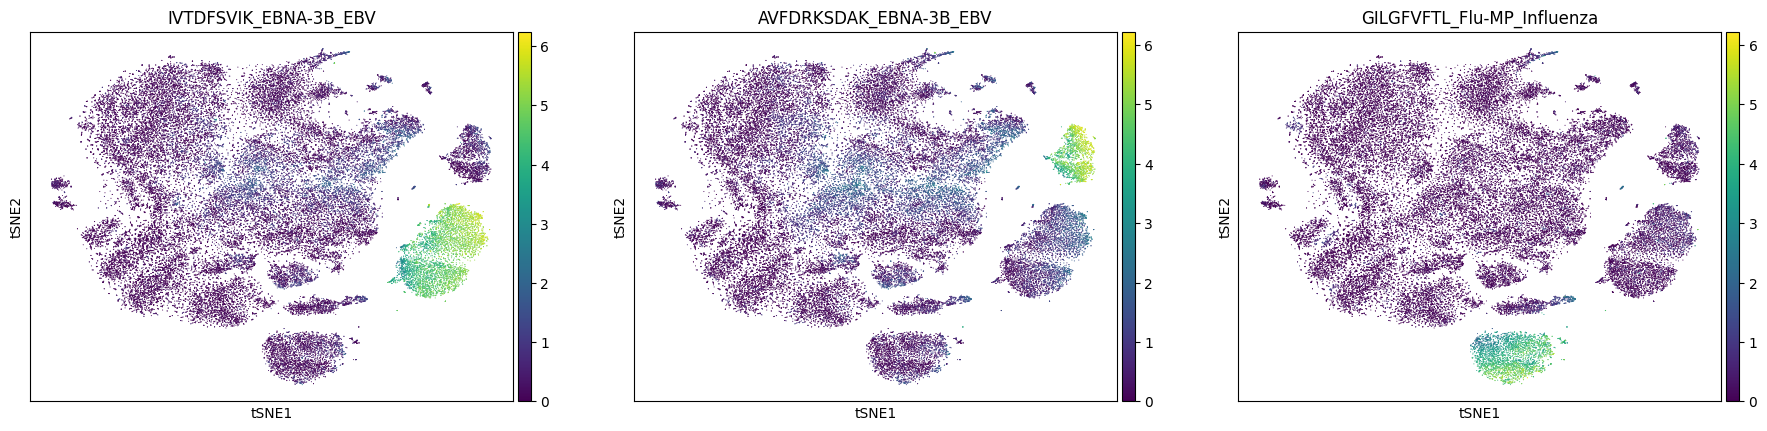

In [63]:
sc.pl.tsne(prot, color=['IVTDFSVIK_EBNA-3B_EBV', 'AVFDRKSDAK_EBNA-3B_EBV','GILGFVFTL_Flu-MP_Influenza'])

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categoric

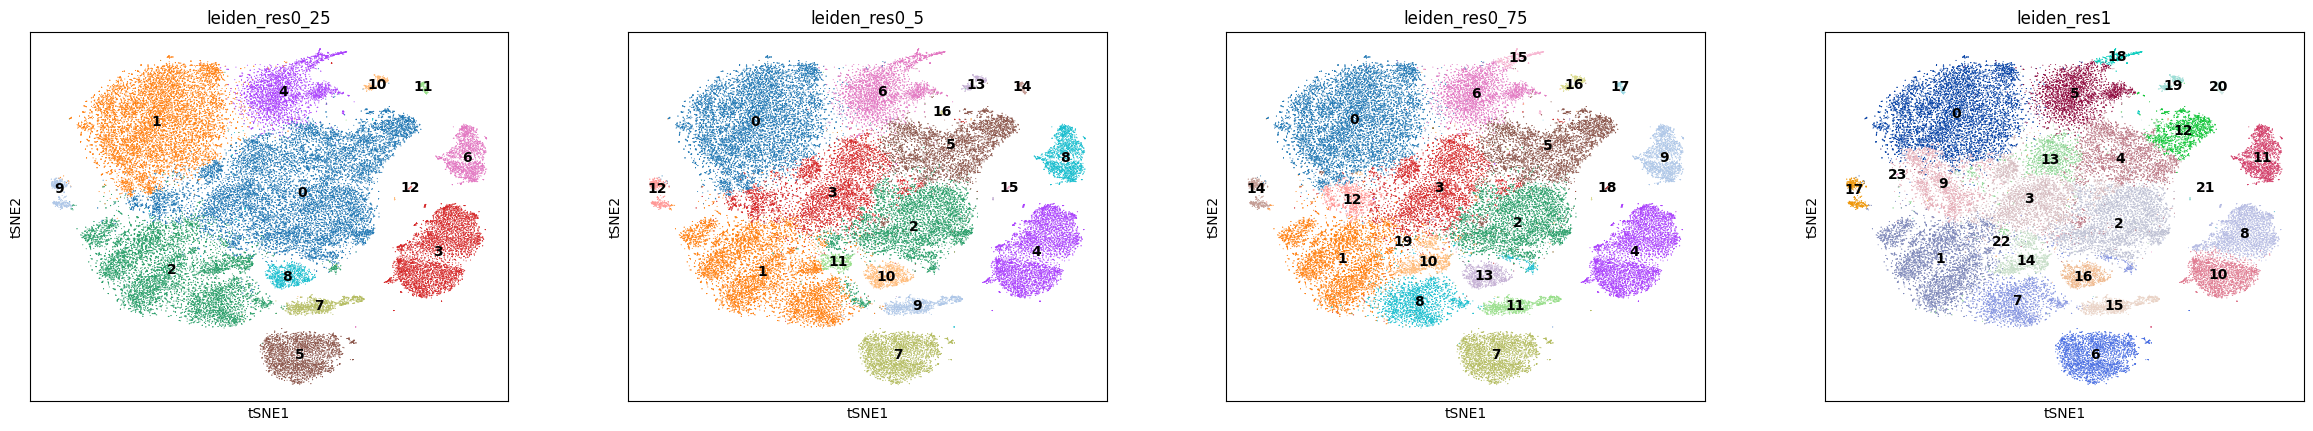

In [64]:
sc.pl.tsne(
    prot,
    color=["leiden_res0_25", "leiden_res0_5","leiden_res0_75", "leiden_res1"],
    legend_loc="on data",
)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categoric

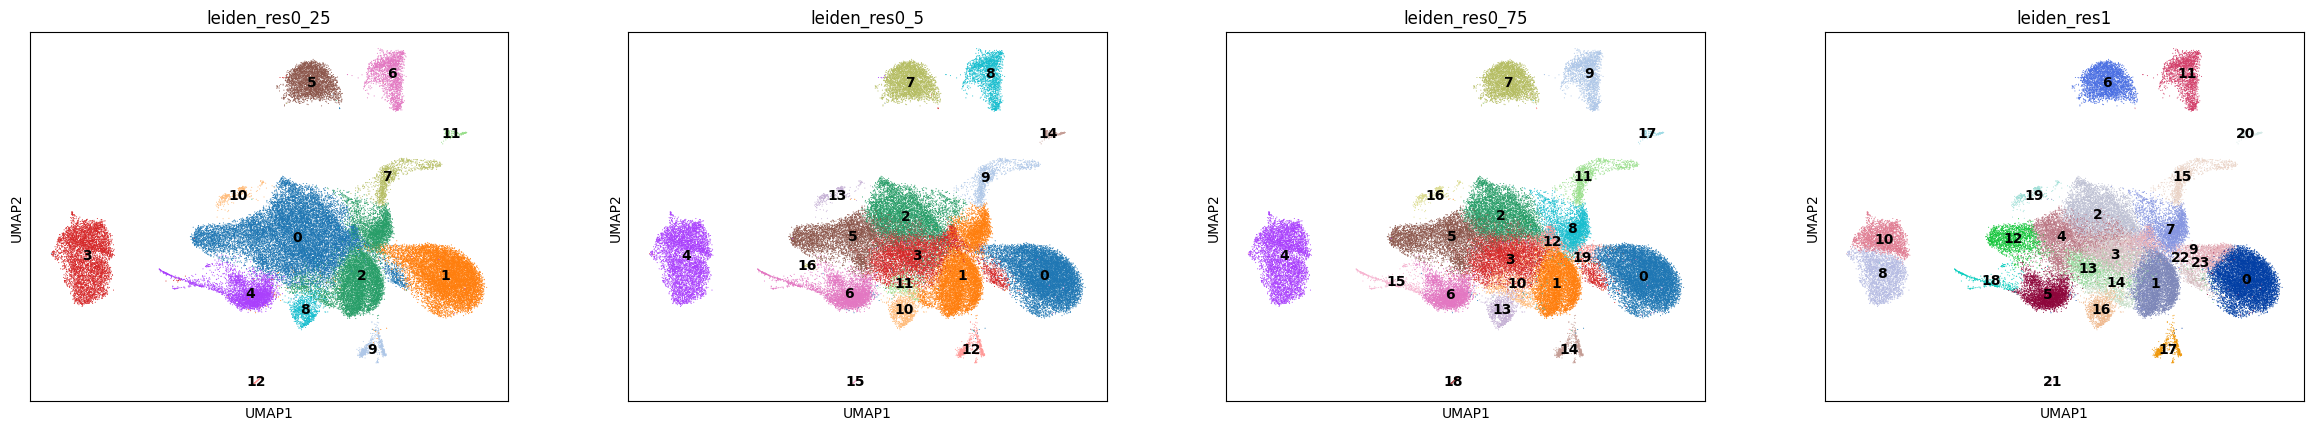

In [65]:
sc.pl.umap(
    prot,
    color=["leiden_res0_25", "leiden_res0_5","leiden_res0_75", "leiden_res1"],
    legend_loc="on data",
)

In [66]:
sc.tl.rank_genes_groups(prot, 'leiden_res0_5', method='t-test_overestim_var')

In [68]:
result = prot.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option('display.max_columns', 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

0_n            0_p                             1_n  \
0              CCR7_TotalSeqC   0.000000e+00                CD45RA_TotalSeqC   
1            CD45RA_TotalSeqC   0.000000e+00                   CD3_TotalSeqC   
2               CD3_TotalSeqC  3.076625e-214       SLFNTVATL_Gag-protein_HIV   
3              CD8a_TotalSeqC  5.526075e-201                 CD127_TotalSeqC   
4             IgG2a_TotalSeqC   2.603379e-42                 IgG2a_TotalSeqC   
5             IgG2b_TotalSeqC   2.183490e-04                 IgG2b_TotalSeqC   
6             CD127_TotalSeqC   7.315198e-01            CLGGLLTMV_LMP-2A_EBV   
7          RAKFKQLL_BZLF1_EBV   2.578467e-11      SLYNTVATLY_Gag-protein_HIV   
8        CLGGLLTMV_LMP-2A_EBV   1.523289e-12                  CD14_TotalSeqC   
9  SLFNTVATLY_Gag-protein_HIV   4.577636e-21  FLASKIGRLV_Ca2-indepen-Plip-A2   

            1_p                             2_n           2_p  \
0  0.000000e+00                CD45RO_TotalSeqC  0.000000e+00   
1  1.028030e-64                  PD-1_TotalSeqC  3.530955e-53   
2  2.103042e-01                   CD3_TotalSeqC  8.723012e-23   
3  5.436085e-01           RLRAEAQVK_EMNA-3A_EBV  5.405951e-10   
4  6.712912e-01                  IgG1_TotalSeqC  9.750750e-10   
5  2.127069e-02                  CD8a_TotalSeqC  4.552692e-04   
6  2.714805e-07              VTEHDTLLY_IE-1_CMV  2.594387e-01   
7  2.469279e-08                 CD127_TotalSeqC  3.364477e-01   
8  2.013251e-08            CLGGLLTMV_LMP-2A_EBV  2.245711e-02   
9  2.833259e-09  FLASKIGRLV_Ca2-indepen-Plip-A2  4.441297e-03   

                        3_n           3_p                        4_n  \
0     RLRAEAQVK_EMNA-3A_EBV  0.000000e+00      IVTDFSVIK_EBNA-3B_EBV   
1    AVFDRKSDAK_EBNA-3B_EBV  2.372147e-87           CD45RO_TotalSeqC   
2  RIAAWMATY_BCL-2L1_Cancer  3.535413e-34             PD-1_TotalSeqC   
3        VTEHDTLLY_IE-1_CMV  9.632993e-02       KLQCVDLHV_PSA146-154   
4           CD127_TotalSeqC  7.429586e-01             IgG1_TotalSeqC   
5              STEGGGLAY_NC  1.621066e-01               STEGGGLAY_NC   
6      CLGGLLTMV_LMP-2A_EBV  1.649970e-04   RIAAWMATY_BCL-2L1_Cancer   
7    KTWGQYWQV_gp100_Cancer  1.226153e-04  RTLNAWVKV_Gag-protein_HIV   
8  KVLEYVIKV_MAGE-A1_Cancer  2.126240e-06               ALIAPVHAV_NC   
9        RAKFKQLL_BZLF1_EBV  1.020962e-06      RLRAEAQVK_EMNA-3A_EBV   

             4_p                       5_n            5_p               6_n  \
0   0.000000e+00          HLA-DR_TotalSeqC   0.000000e+00    CCR7_TotalSeqC   
1   0.000000e+00          CD45RO_TotalSeqC   0.000000e+00  CD45RA_TotalSeqC   
2   0.000000e+00            PD-1_TotalSeqC   0.000000e+00    PD-1_TotalSeqC   
3   0.000000e+00            CD8a_TotalSeqC  8.364139e-129   IgG2a_TotalSeqC   
4   0.000000e+00     RLRAEAQVK_EMNA-3A_EBV  2.909857e-120   IgG2b_TotalSeqC   
5   0.000000e+00            IgG1_TotalSeqC   1.715040e-75    CD14_TotalSeqC   
6   0.000000e+00             CD3_TotalSeqC   7.831827e-70    CD19_TotalSeqC   
7   0.000000e+00  RIAAWMATY_BCL-2L1_Cancer   6.542957e-29     CD4_TotalSeqC   
8  2.843428e-260    AVFDRKSDAK_EBNA-3B_EBV   1.185870e-18    IgG1_TotalSeqC   
9  2.820904e-217             CD4_TotalSeqC   1.141269e-02  HLA-DR_TotalSeqC   

             6_p                         7_n           7_p  \
0   0.000000e+00  GILGFVFTL_Flu-MP_Influenza  0.000000e+00   
1   0.000000e+00            CD45RO_TotalSeqC  1.259137e-12   
2   0.000000e+00          YLLEMLWRL_LMP1_EBV  3.354597e-02   
3   0.000000e+00      IMDQVPFSV_gp100_Cancer  2.542747e-01   
4  2.674574e-251        QPRAPIRPI_EBNA-6_EBV  3.212407e-01   
5  1.169189e-208                AAKGRGAAL_NC  3.420176e-01   
6  8.367588e-193         FLYALALLL_LMP2A_EBV  7.350841e-01   
7  1.321264e-140             CD127_TotalSeqC  7.732784e-01   
8  6.108010e-119          RAKFKQLL_BZLF1_EBV  8.885948e-01   
9  4.849544e-115          ELRRKMMYM_IE-1_CMV  5.409338e-01   

                            8_n            8_p                    9_n  \
0        A

In [69]:
sc.tl.rank_genes_groups(prot, 'leiden_res0_75', method='t-test_overestim_var')

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


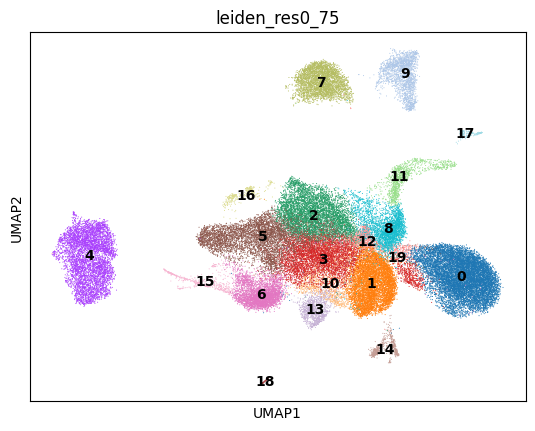

In [71]:
sc.pl.umap(
    prot,
    color=["leiden_res0_75"],
    legend_loc="on data",
)

In [72]:
result = prot.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option('display.max_columns', 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

0_n            0_p  \
0              CCR7_TotalSeqC   0.000000e+00   
1            CD45RA_TotalSeqC   0.000000e+00   
2               CD3_TotalSeqC  1.006775e-257   
3              CD8a_TotalSeqC  1.093773e-237   
4             IgG2a_TotalSeqC   2.706561e-50   
5             IgG2b_TotalSeqC   2.812298e-06   
6             CD127_TotalSeqC   6.919456e-01   
7        CLGGLLTMV_LMP-2A_EBV   5.806734e-12   
8          RAKFKQLL_BZLF1_EBV   1.189621e-12   
9  SLFNTVATLY_Gag-protein_HIV   2.306067e-19   

                                  1_n            1_p  \
0                    CD45RA_TotalSeqC   0.000000e+00   
1                       CD3_TotalSeqC  5.511593e-119   
2                     CD127_TotalSeqC   7.204740e-01   
3                CLGGLLTMV_LMP-2A_EBV   2.169398e-06   
4      FLASKIGRLV_Ca2-indepen-Plip-A2   7.410126e-08   
5           LLMGTLGIVC_HPV-16E7_82-91   8.078644e-09   
6          SLYNTVATLY_Gag-protein_HIV   3.920006e-09   
7        CLLWSFQTSA_Tyrosinase_Cancer   1.158345e-12   
8  CLLGTYTQDV_Kanamycin-B-dioxygenase   1.252112e-14   
9          SLFNTVATLY_Gag-protein_HIV   2.656972e-16   

                        2_n           2_p                       3_n  \
0          CD45RO_TotalSeqC  0.000000e+00     RLRAEAQVK_EMNA-3A_EBV   
1            PD-1_TotalSeqC  2.820739e-35    AVFDRKSDAK_EBNA-3B_EBV   
2             CD3_TotalSeqC  4.795153e-24  RIAAWMATY_BCL-2L1_Cancer   
3     RLRAEAQVK_EMNA-3A_EBV  1.048874e-20        VTEHDTLLY_IE-1_CMV   
4            IgG1_TotalSeqC  1.550504e-14              STEGGGLAY_NC   
5            CD8a_TotalSeqC  2.643635e-04          CD45RA_TotalSeqC   
6        VTEHDTLLY_IE-1_CMV  5.416508e-03           CD127_TotalSeqC   
7           CD127_TotalSeqC  4.294951e-01    KTWGQYWQV_gp100_Cancer   
8  RIAAWMATY_BCL-2L1_Cancer  1.698870e-01  KVLEYVIKV_MAGE-A1_Cancer   
9      CLGGLLTMV_LMP-2A_EBV  3.321876e-02     IVTDFSVIK_EBNA-3B_EBV   

             3_p                        4_n            4_p  \
0   0.000000e+00      IVTDFSVIK_EBNA-3B_EBV   0.000000e+00   
1  8.683427e-168           CD45RO_TotalSeqC   0.000000e+00   
2   9.521177e-66             PD-1_TotalSeqC   0.000000e+00   
3   1.556340e-04       KLQCVDLHV_PSA146-154   0.000000e+00   
4   2.395860e-02             IgG1_TotalSeqC   0.000000e+00   
5   5.297100e-01               STEGGGLAY_NC   0.000000e+00   
6   8.720133e-01   RIAAWMATY_BCL-2L1_Cancer   0.000000e+00   
7   3.389266e-02  RTLNAWVKV_Gag-protein_HIV   0.000000e+00   
8   1.872383e-02               ALIAPVHAV_NC  1.155119e-259   
9   4.650464e-03      RLRAEAQVK_EMNA-3A_EBV  4.494852e-216   

                        5_n            5_p               6_n            6_p  \
0          HLA-DR_TotalSeqC   0.000000e+00    CCR7_TotalSeqC   0.000000e+00   
1          CD45RO_TotalSeqC   0.000000e+00  CD45RA_TotalSeqC   0.000000e+00   
2            PD-1_TotalSeqC   0.000000e+00    PD-1_TotalSeqC   0.000000e+00   
3            CD8a_TotalSeqC  3.502464e-133   IgG2a_TotalSeqC  8.620647e-195   
4     RLRAEAQVK_EMNA-3A_EBV  3.228970e-120   IgG2b_TotalSeqC  3.558048e-121   
5            IgG1_TotalSeqC   8.951394e-71    CD14_TotalSeqC   7.406682e-84   
6             CD3_TotalSeqC   3.872500e-69    CD19_TotalSeqC   1.379026e-70   
7  RIAAWMATY_BCL-2L1_Cancer   7.287838e-28     CD4_TotalSeqC   7.064573e-36   
8    AVFDRKSDAK_EBNA-3B_EBV   3.524937e-17  HLA-DR_TotalSeqC   3.602006e-33   
9             CD4_TotalSeqC   3.310926e-02    IgG1_TotalSeqC   2.007967e-21   

                          7_n           7_p                           8_n  \
0  GILGFVFTL_Flu-MP_Influenza  0.000000e+00                CD14_TotalSeqC   
1            CD45RO_TotalSeqC  4.222447e-13               IgG2a_TotalSeqC   
2          YLLEMLWRL_LMP1_EBV  3.484646e-02              CD45RA_TotalSeqC   
3      IMDQVPFSV_gp100_Cancer  2.612070e-01               IgG2b_TotalSeqC   
4        QPRAPIRPI_EBNA-6_EBV  3.308644e-01                 CD4_TotalSeqC   
5                AAKGRGAAL_NC  3.508280e-01                CD19_TotalSeqC   
6     

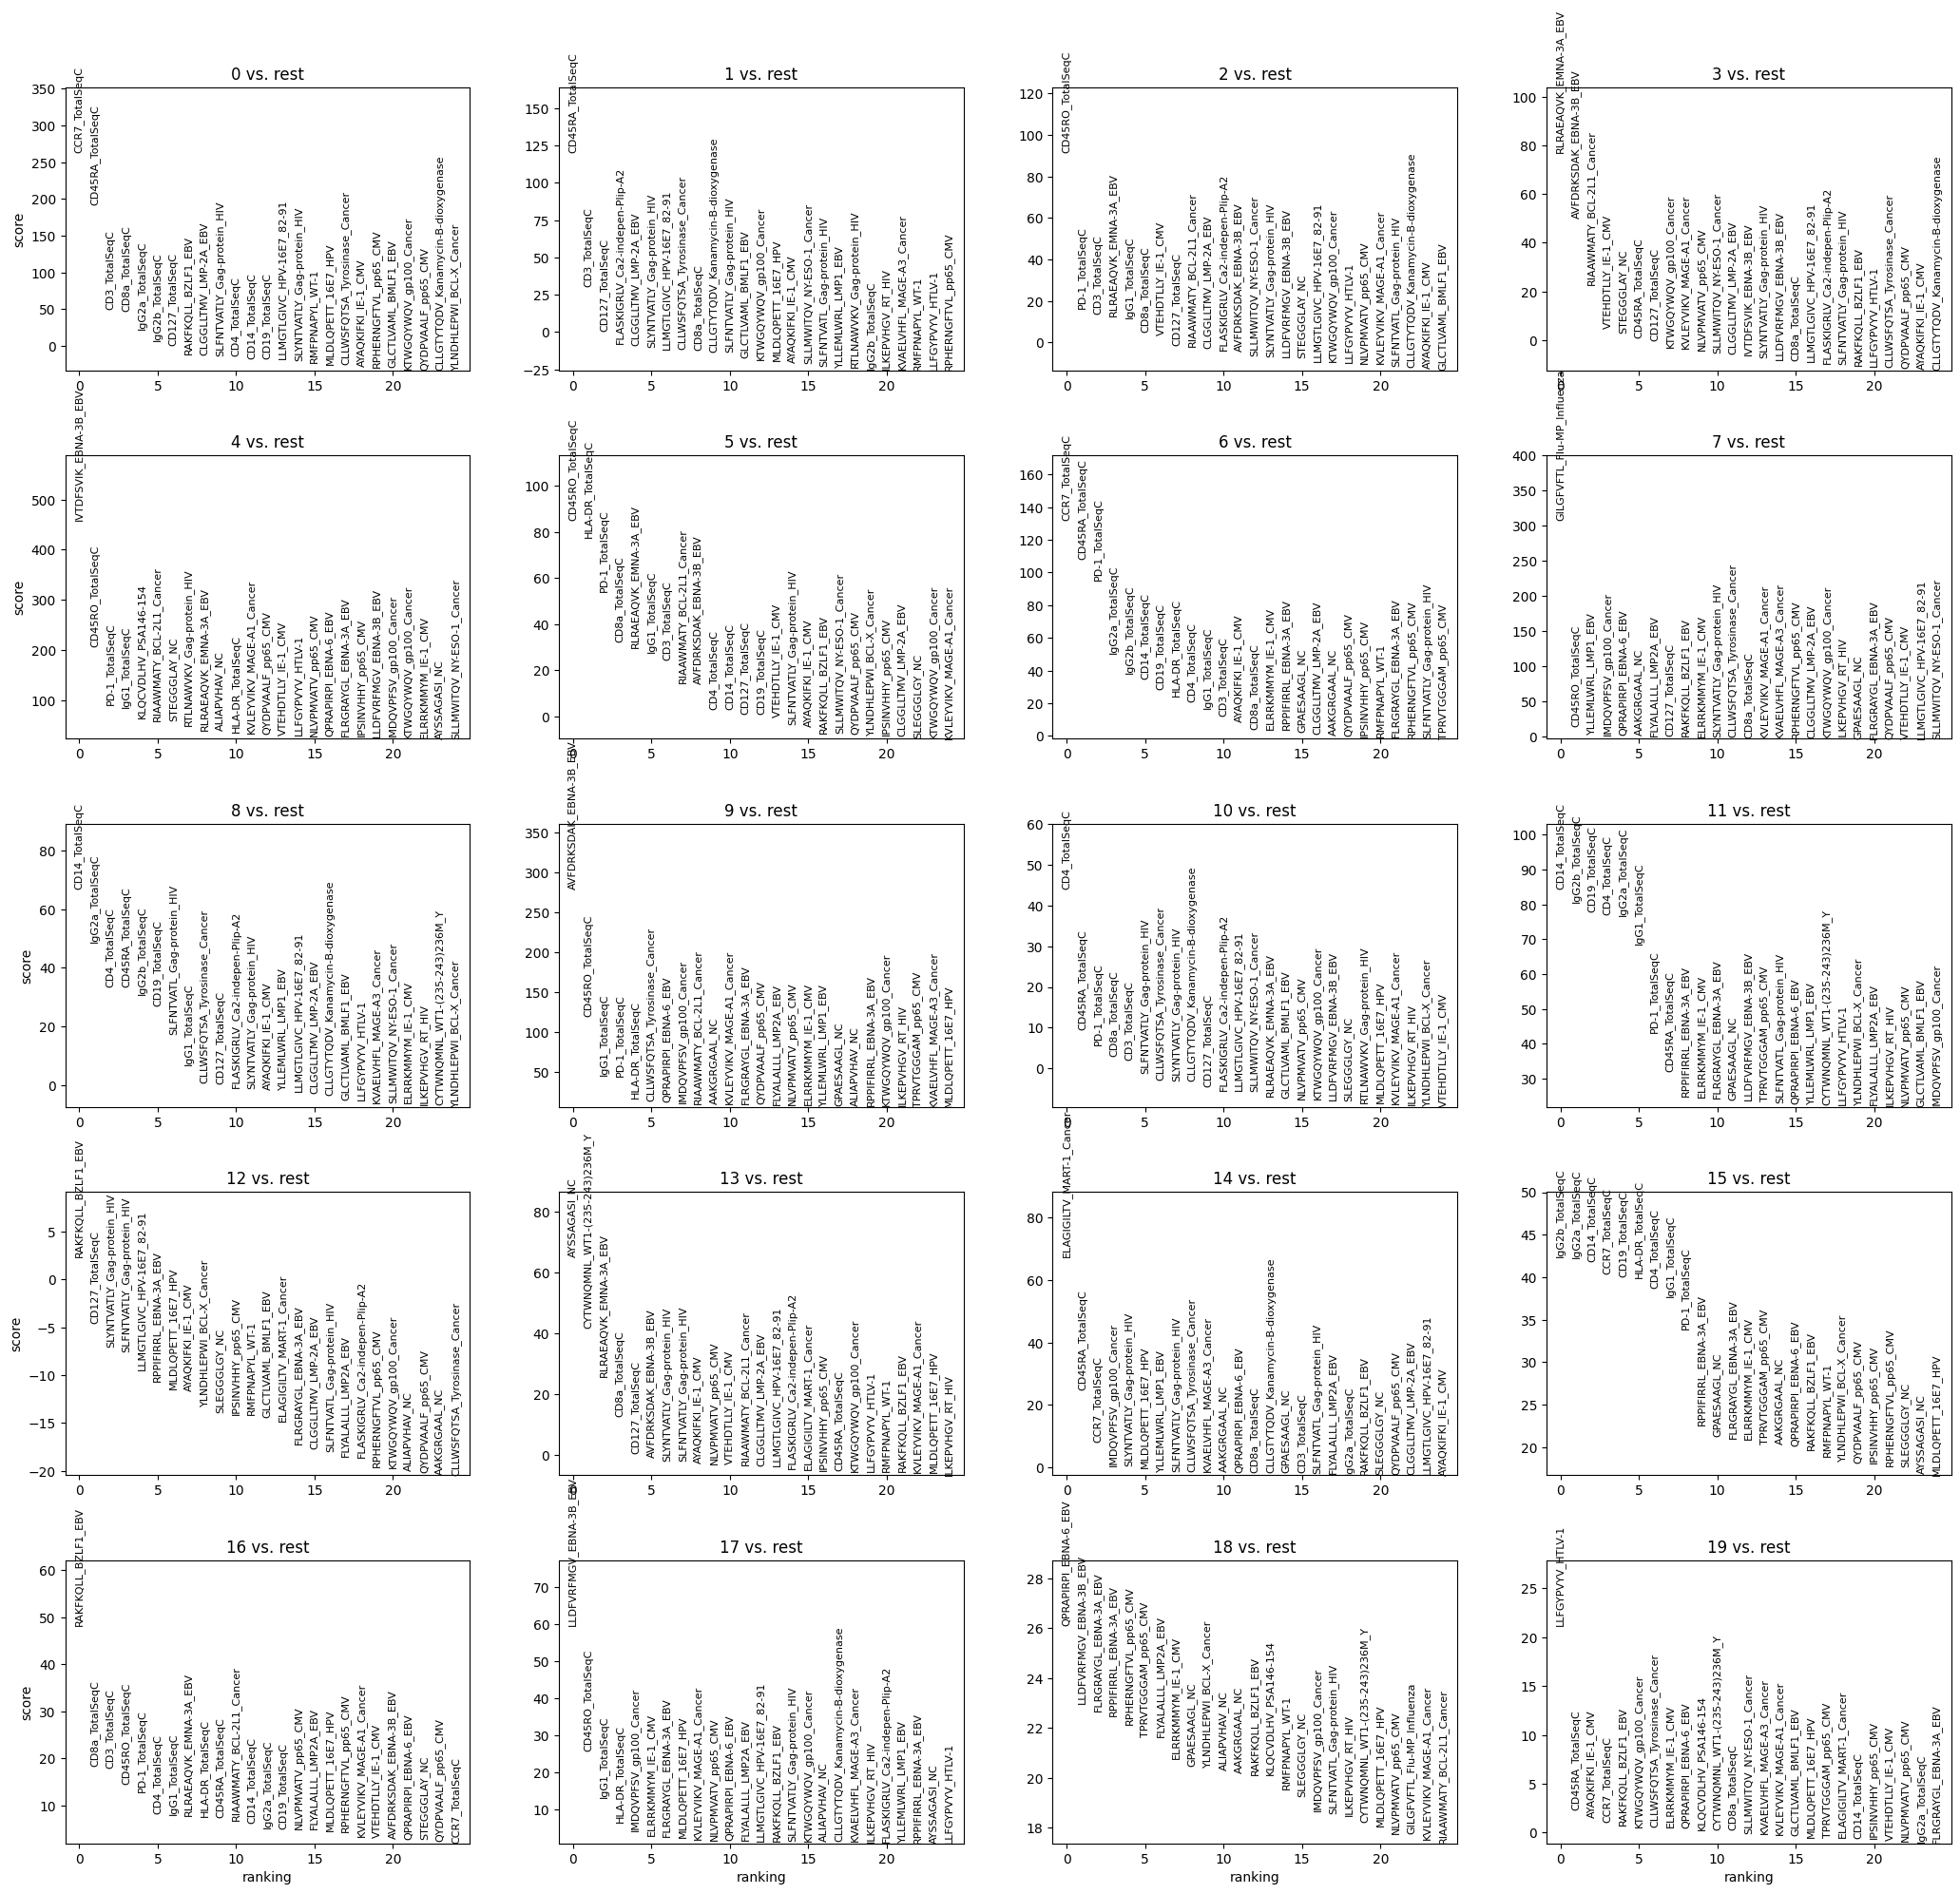

In [73]:
sc.tl.rank_genes_groups(prot, "leiden_res0_75", method="t-test")
sc.pl.rank_genes_groups(prot, n_genes=25, sharey=False)

In [77]:
prot.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACGGGAGAAGATTC-1                  20                 3.044522        3401.0   
AAACGGGTCGGACAAG-1                  12                 2.564949        8897.0   
AAAGATGGTACAGACG-1                  11                 2.484907       11910.0   
AAAGTAGAGACGCTTT-1                   7                 2.079442        5791.0   
AAAGTAGAGCGCTTAT-1                  10                 2.397895        8076.0   
...                                ...                      ...           ...   
TTTGTCAAGGACAGCT-40                 17                 2.890372        5708.0   
TTTGTCAAGGGTCTCC-40                 16                 2.833213        3869.0   
TTTGTCACACGTCTCT-40                 16                 2.833213        5685.0   
TTTGTCAGTTACGCGC-40                 18                 2.944439        5828.0   
TTTGTCATCAGGTAAA-40                 17                 2.890372        3714.0   

                     log1p_total_counts leiden_res0_25 leiden_res0_5  \
AAACGGGAGAAGATTC-1             8.132119              0             2   
AAACGGGTCGGACAAG-1             9.093582              0             2   
AAAGATGGTACAGACG-1             9.385218              2             1   
AAAGTAGAGACGCTTT-1             8.664233              0             2   
AAAGTAGAGCGCTTAT-1             8.996776              2             1   
...                                 ...            ...           ...   
TTTGTCAAGGACAGCT-40            8.649799              4             6   
TTTGTCAAGGGTCTCC-40            8.261010              4             6   
TTTGTCACACGTCTCT-40            8.645762              0             5   
TTTGTCAGTTACGCGC-40            8.670601              4             6   
TTTGTCATCAGGTAAA-40            8.220134              4             6   

                    leiden_res0_75 leiden_res1  
AAACGGGAGAAGATTC-1               2           2  
AAACGGGTCGGACAAG-1               2           2  
AAAGATGGTACAGACG-1               1           1  
AAAGTAGAGACGCTTT-1               2           2  
AAAGTAGAGCGCTTAT-1               1           1  
...                            ...         ...  
TTTGTCAAGGACAGCT-40              6           5  
TTTGTCAAGGGTCTCC-40              6           5  
TTTGTCACACGTCTCT-40              5           4  
TTTGTCAGTTACGCGC-40              6           5  
TTTGTCATCAGGTAAA-40              6           5  

[55206 rows x 8 columns]

In [78]:
cl_annotation = {
    "3": "RLRAEAQVK",
    "4": "IVTDFSVIK",
    "7": "GILGFVFTL",
    "9": "AVFDRKSDAK",
    "12":"RAKFKQLL",
    "14":"ELAGIGILTV",
    "16":"RAKFKQLL",
    "17":"LLDFVRFMGV",
    "19":"LLFGYPVYV",
    
}
prot.obs["manual_celltype_annotation"] = prot.obs.leiden_res0_75.map(cl_annotation)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


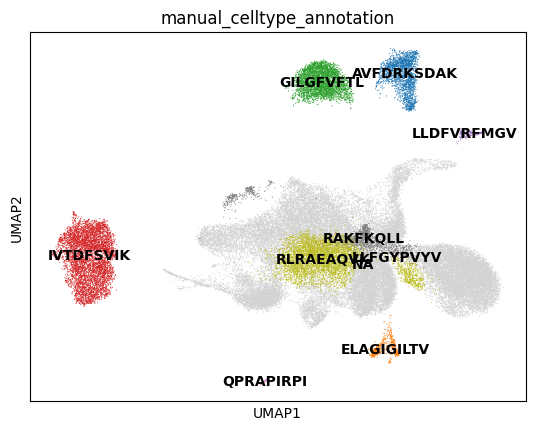

In [79]:
sc.pl.umap(
    prot,
    color=["manual_celltype_annotation"],
    legend_loc="on data",
)

In [120]:
prot.obs[~prot.obs['manual_celltype_annotation'].isna()].reset_index().rename({'manual_celltype_annotation':'top_tetramer','index':'barcode'},axis=1)[['barcode','top_tetramer']].to_csv('donor1_top_tetramer.csv',index=False)


/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

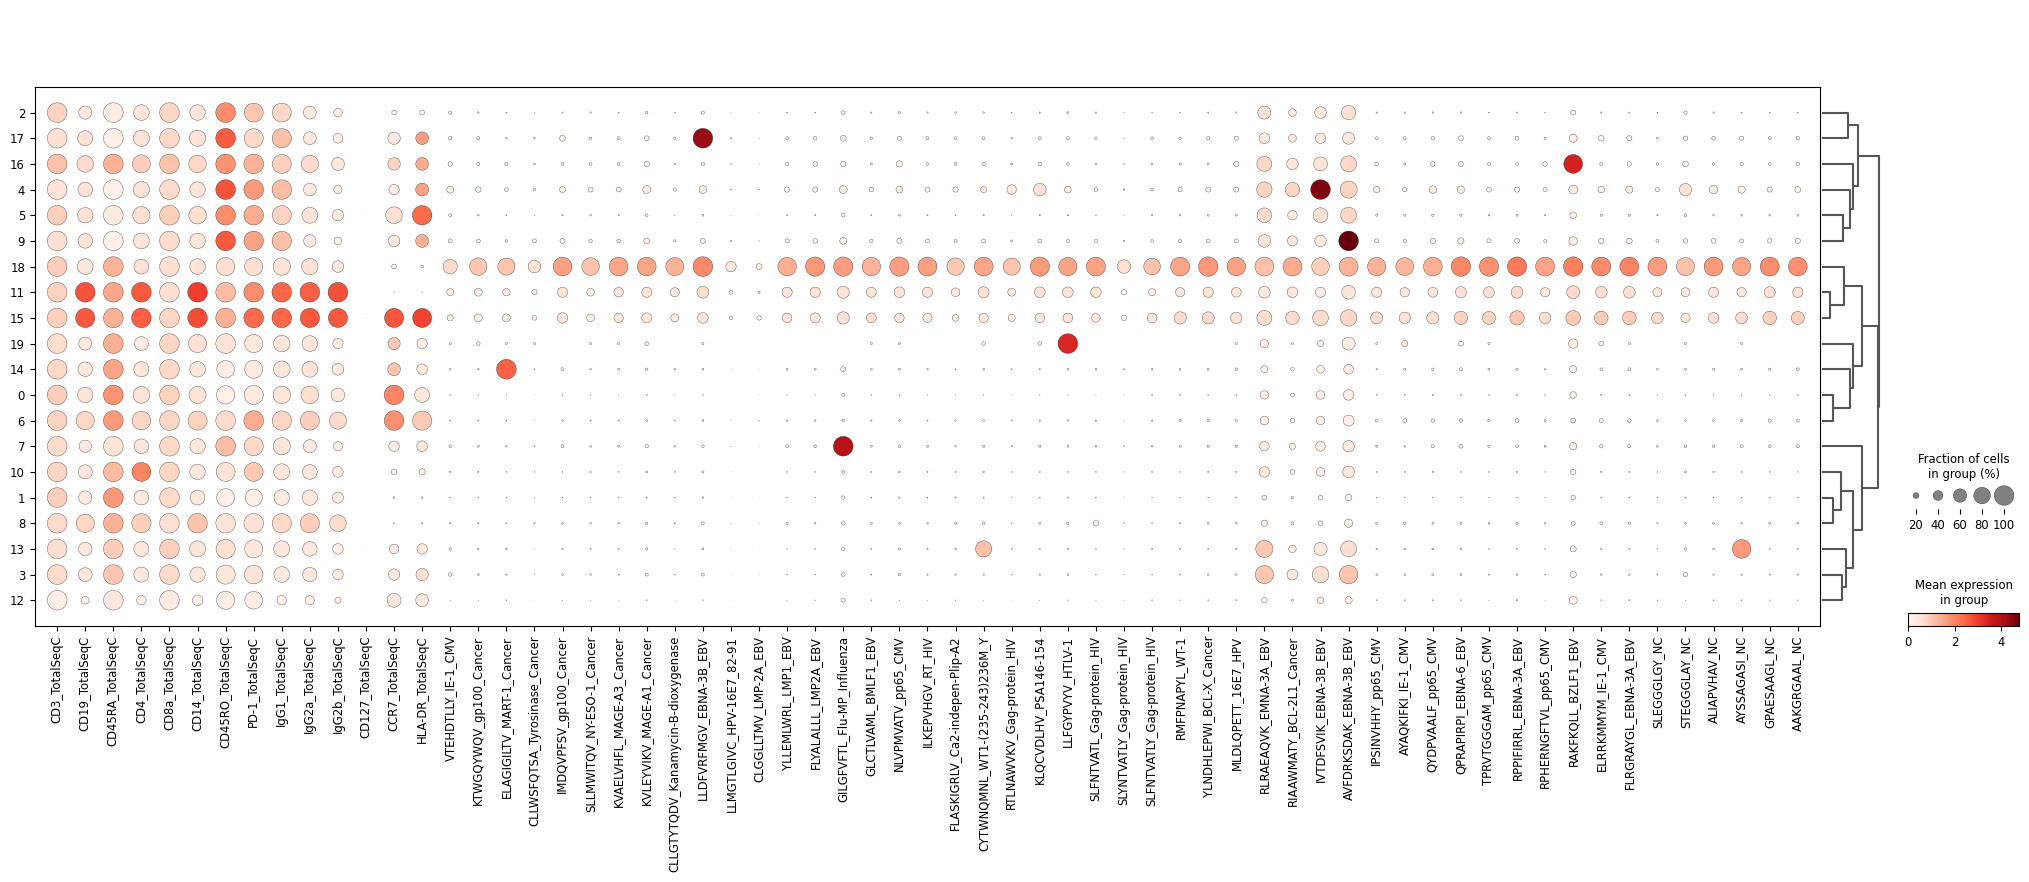

In [85]:
sc.pl.dotplot(prot, prot.var.index, "leiden_res0_75", dendrogram=True)

In [103]:
prot_4 = prot[prot.obs['leiden_res0_75'].isin(['4'])]
prot_7 = prot[prot.obs['leiden_res0_75'].isin(['7'])]
prot_7 = prot[prot.obs['leiden_res0_75'].isin(['7'])]

/scratch/ipykernel_3083389/1288075624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.get.obs_df(


<Axes: ylabel='Density'>

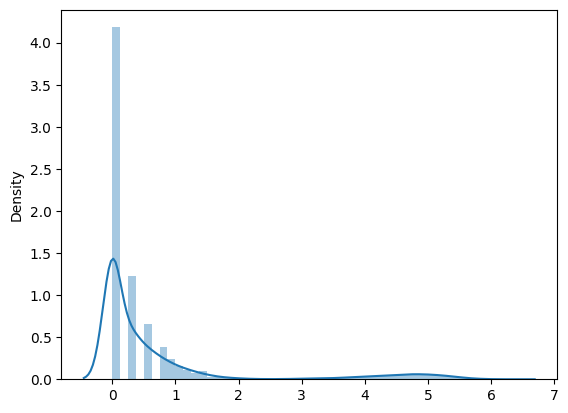

In [108]:
sns.distplot(sc.get.obs_df(
        prot,
        keys=["IVTDFSVIK_EBNA-3B_EBV"]
    ))

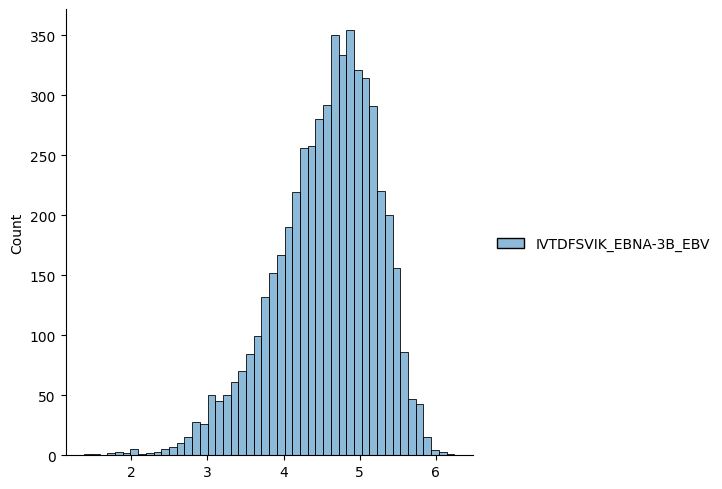

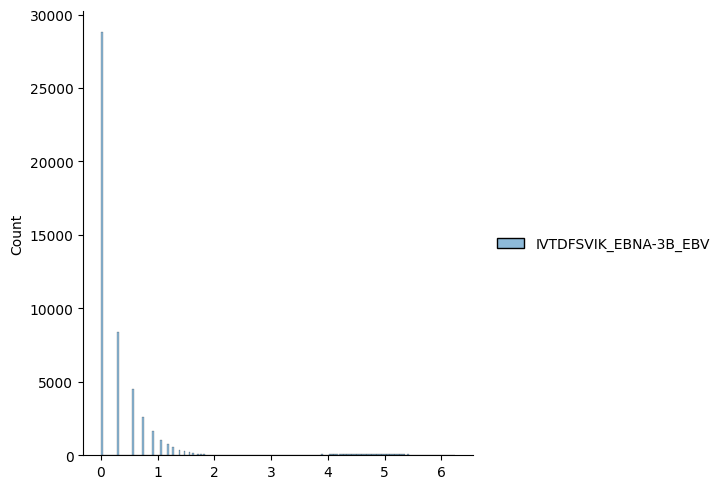

In [129]:
sns.displot(sc.get.obs_df(
        prot_4,
        keys=["IVTDFSVIK_EBNA-3B_EBV"]
    ))
sns.displot(sc.get.obs_df(
        prot,
        keys=["IVTDFSVIK_EBNA-3B_EBV"]
    )).set_titles('among all clusters')

In [102]:
prot[prot.obs['leiden_res0_75']==3]

<0x63 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

/scratch/ipykernel_3083389/221546626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.get.obs_df(


<Axes: ylabel='Density'>

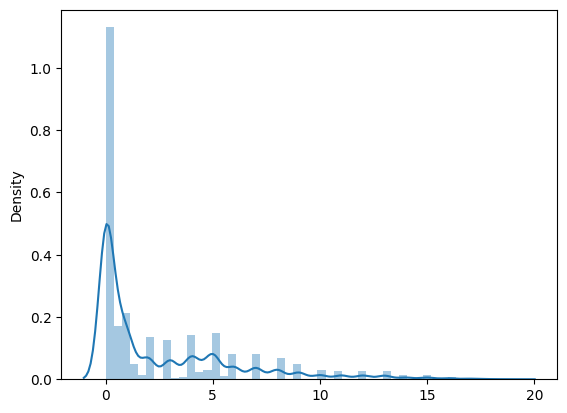

In [100]:
sns.distplot(sc.get.obs_df(
        prot,
        keys=["IVTDFSVIK_EBNA-3B_EBV","leiden_res0_75"]
    ))

In [8]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [9]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=False)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


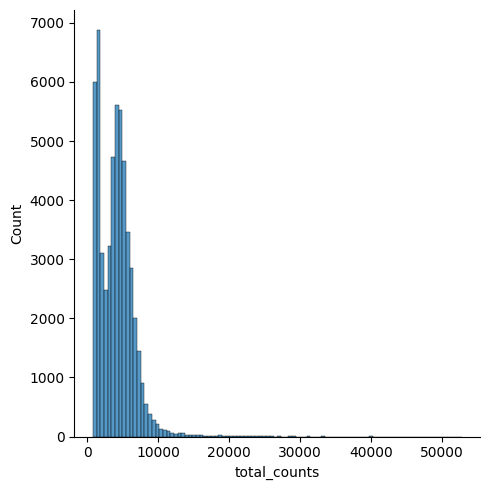

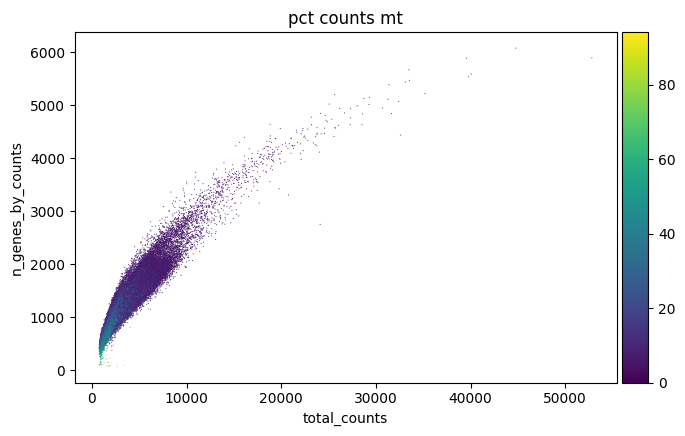

In [10]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

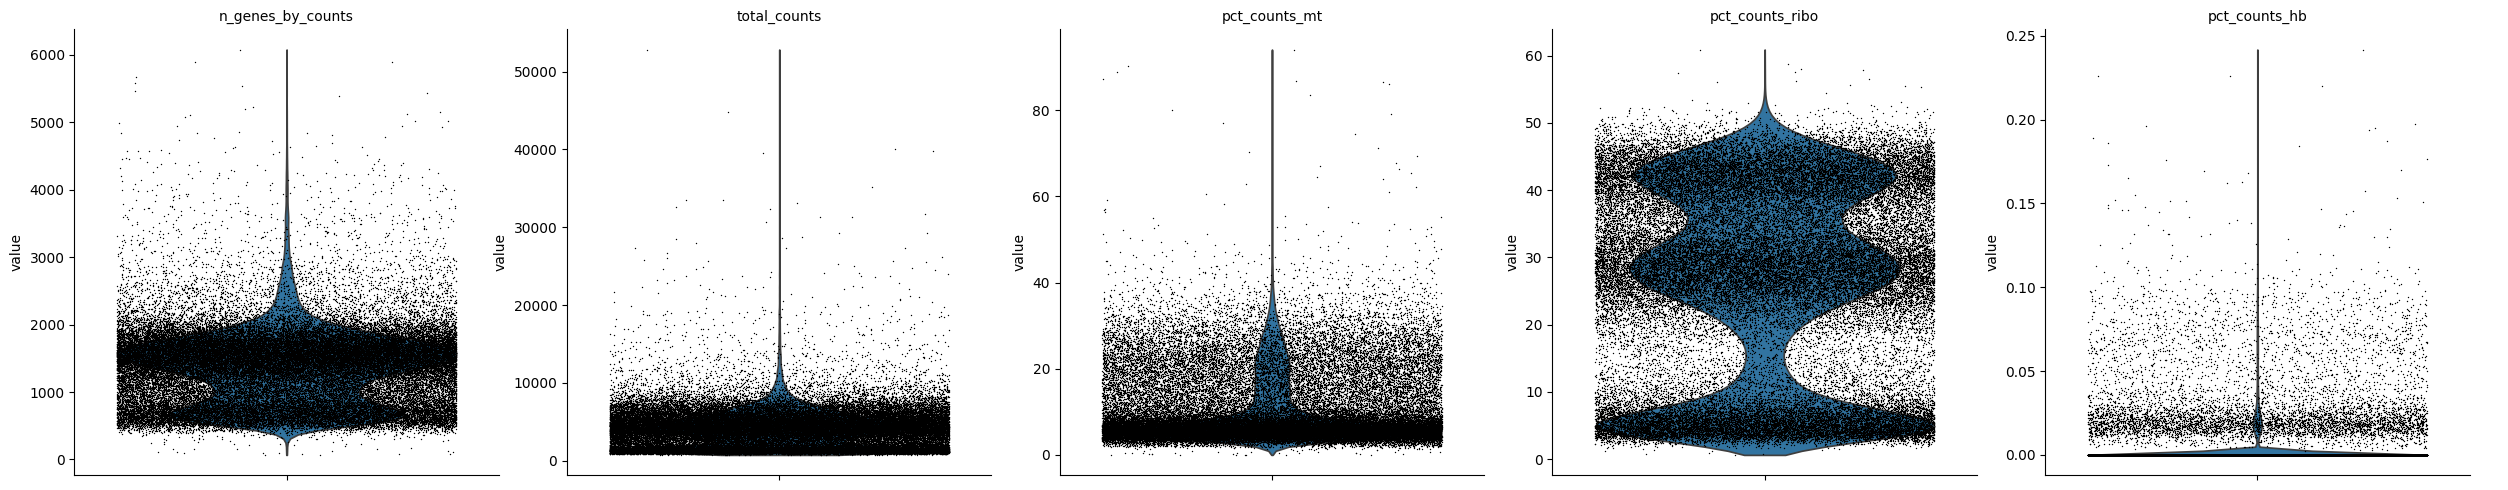

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo','pct_counts_hb'],
             jitter=0.4, multi_panel=True)

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

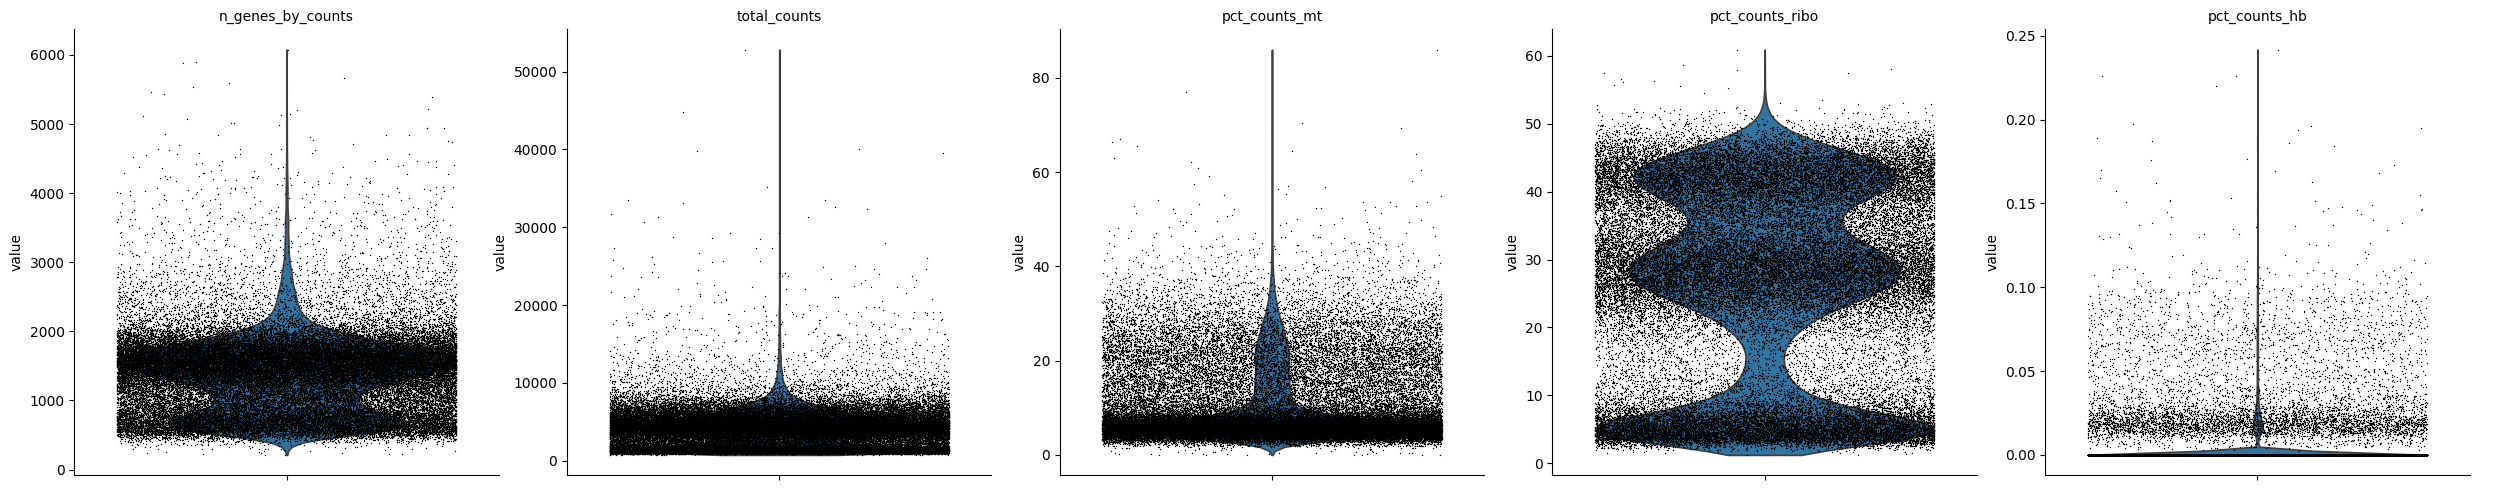

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo','pct_counts_hb'],
             jitter=0.4, multi_panel=True)

In [12]:
print(adata.n_obs, adata.n_vars)

9409 25727


In [14]:
adata.obs["outlier"] = adata.obs.n_genes_by_counts > 5000
adata.obs["mt_outlier"] = adata.obs.pct_counts_mt > 20
adata.obs["ribo_outlier"] = adata.obs.pct_counts_ribo < 3

In [15]:
adata.obs.outlier.value_counts()

outlier
False    55170
True        17
Name: count, dtype: int64

In [16]:
adata.obs.mt_outlier.value_counts()

mt_outlier
False    47228
True      7959
Name: count, dtype: int64

In [17]:
adata.obs.ribo_outlier.value_counts()

ribo_outlier
False    54464
True       723
Name: count, dtype: int64

In [18]:
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier) & (~adata.obs.ribo_outlier)].copy()

In [19]:
print(adata.n_obs, adata.n_vars)

46959 20079


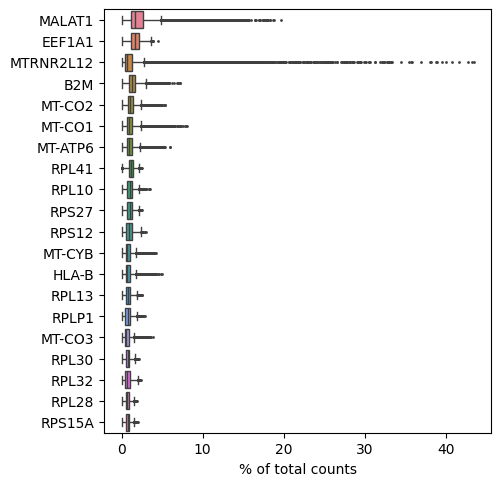

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [21]:
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith('MT-')
ribo_genes = adata.var_names.str.startswith(("RPS","RPL"))
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(mito_genes, malat1)
remove = np.add(remove, ribo_genes)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

46959 19956


/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


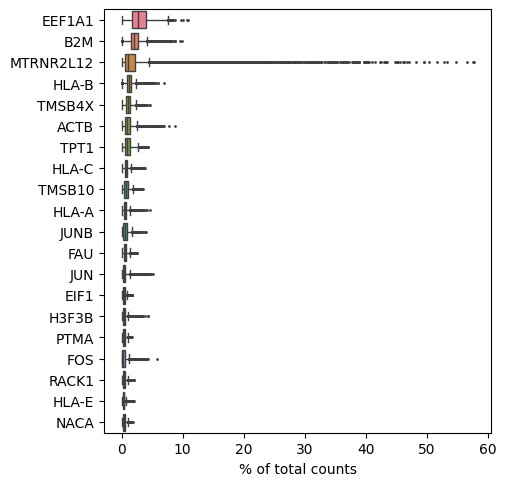

In [22]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [23]:
sc.pp.normalize_total(adata, target_sum=1e4)


In [24]:
sc.pp.log1p(adata)

In [25]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


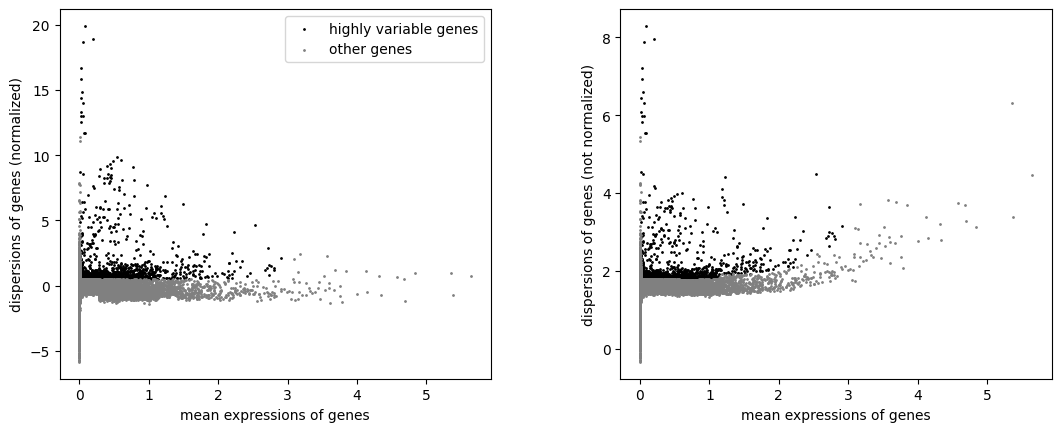

In [26]:
sc.pl.highly_variable_genes(adata)

In [27]:
adata.raw = adata

In [28]:
adata = adata[:, adata.var.highly_variable]

In [29]:
sc.pp.scale(adata, max_value=10)


/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [30]:
sc.tl.pca(adata)

In [31]:
sc.pp.neighbors(adata, n_neighbors=30,n_pcs=10)

In [32]:
sc.tl.umap(adata)

In [38]:
adata.var

gene_ids    feature_types     mt   ribo     hb  \
TNFRSF18    ENSG00000186891  Gene Expression  False  False  False   
TNFRSF4     ENSG00000186827  Gene Expression  False  False  False   
CCNL2       ENSG00000221978  Gene Expression  False  False  False   
CDK11A      ENSG00000008128  Gene Expression  False  False  False   
PLCH2       ENSG00000149527  Gene Expression  False  False  False   
...                     ...              ...    ...    ...    ...   
COL6A2      ENSG00000142173  Gene Expression  False  False  False   
PCNT        ENSG00000160299  Gene Expression  False  False  False   
DIP2A       ENSG00000160305  Gene Expression  False  False  False   
S100B       ENSG00000160307  Gene Expression  False  False  False   
AL354822.1  ENSG00000278384  Gene Expression  False  False  False   

            n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
TNFRSF18                  643     0.014310              98.835272   
TNFRSF4                   668     0.013658              98.789987   
CCNL2                   10630     0.218400              80.744847   
CDK11A                   8125     0.162500              85.282397   
PLCH2                    1825     0.040449              96.694200   
...                       ...          ...                    ...   
COL6A2                   3850     0.086331              93.026120   
PCNT                     4818     0.098721              91.272688   
DIP2A                   10865     0.229106              80.319168   
S100B                    3071     0.140890              94.437199   
AL354822.1                249     0.004528              99.548962   

            total_counts  n_cells  highly_variable     means  dispersions  \
TNFRSF18           790.0      643             True  0.064886     1.948558   
TNFRSF4            754.0      668             True  0.062192     1.867924   
CCNL2            12057.0    10630             True  0.693972     1.802263   
CDK11A            8971.0     8125             True  0.537867     1.805910   
PLCH2             2233.0     1825             True  0.176760     1.973514   
...                  ...      ...              ...       ...          ...   
COL6A2            4766.0     3850             True  0.337218     2.033553   
PCNT              5450.0     4817             True  0.346135     1.805084   
DIP2A            12648.0    10865             True  0.695206     1.823145   
S100B             7778.0     3071             True  0.459054     2.641373   
AL354822.1         250.0      249             True  0.019743     1.833015   

            dispersions_norm      mean       std  
TNFRSF18            0.966295  0.022494  0.200608  
TNFRSF4             0.725451  0.022548  0.196958  
CCNL2               0.586882  0.340238  0.702134  
CDK11A              0.551636  0.246558  0.610497  
PLCH2               1.040833  0.063707  0.335911  
...                      ...       ...       ...  
COL6A2              1.519574  0.129276  0.472593  
PCNT                0.548124  0.146154  0.480868  
DIP2A               0.673118  0.338623  0.702325  
S100B               4.104031  0.134748  0.540894  
AL354822.1          0.621183  0.007084  0.110310  

[1838 rows x 16 columns]

In [33]:
sc.tl.tsne(adata, use_rep="X_pca")

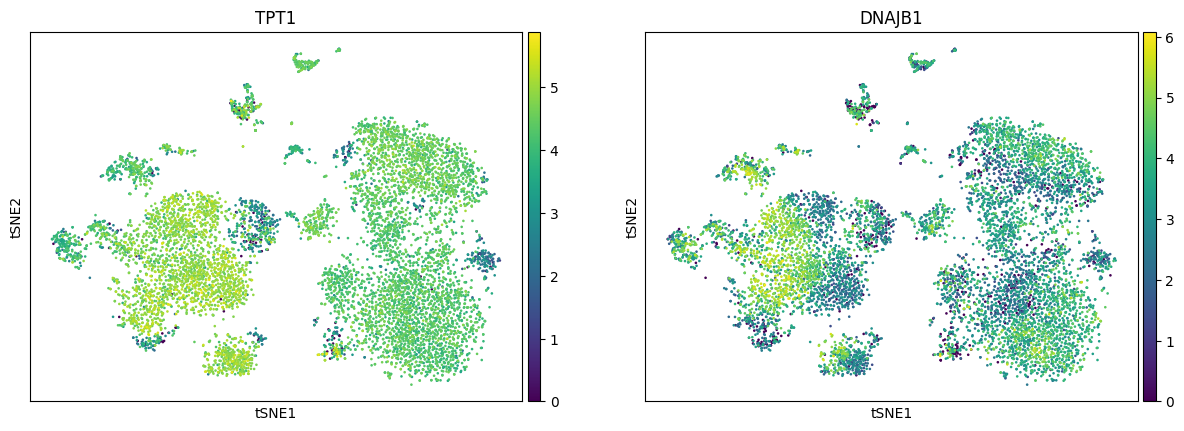

In [34]:
sc.pl.tsne(adata, color=['TPT1',"DNAJB1"])

In [35]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ykremlyakova/.conda/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categoric

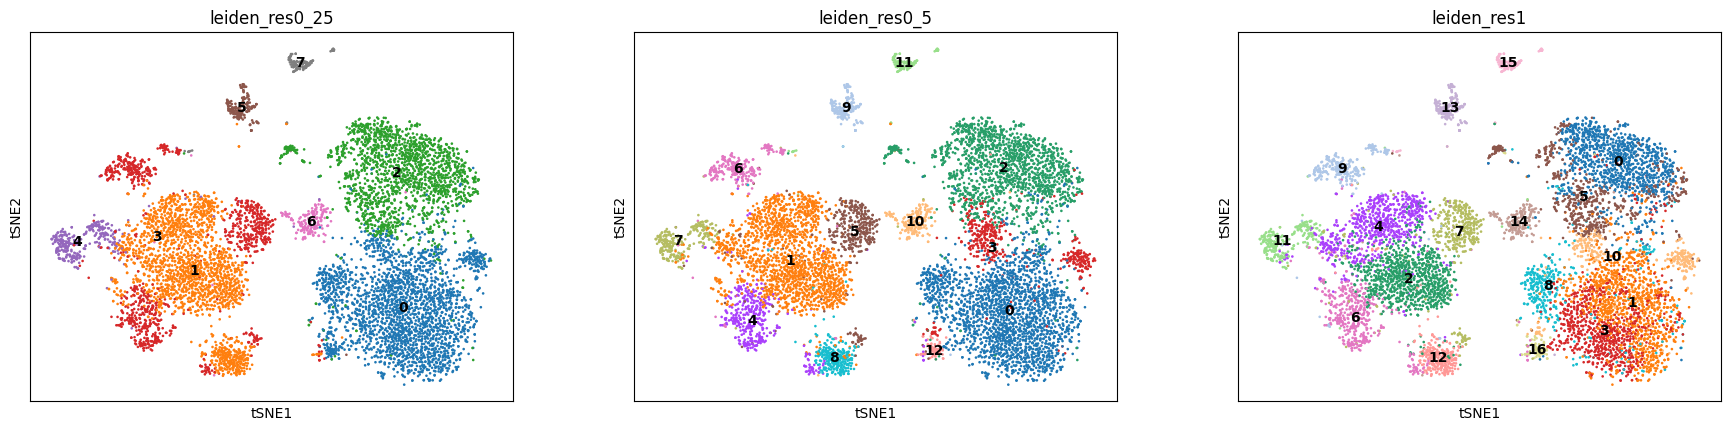

In [37]:
sc.pl.tsne(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)